# Determinants of unequal access to early childcare structures

https://towardsdatascience.com/top-machine-learning-algorithms-for-classification-2197870ff501
https://medium.com/@sakshi.babbar/exploring-classification-algorithms-guide-to-select-the-right-model-for-your-data-73b08b187a01
https://christophm.github.io/interpretable-ml-book/simple.html
https://towardsdatascience.com/three-interpretability-methods-to-consider-when-developing-your-machine-learning-model-5bf368b47fac
https://en.wikipedia.org/wiki/Gradient_boosting
https://xgboost.readthedocs.io/en/stable/
https://christophm.github.io/interpretable-ml-book/

[] Regularisation
[] Interpretability
[] Limitation

## Library

In [175]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
import pickle as pkl
from sklearn import tree as tr
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



In [18]:

# Knowledge (KnowsCreche	KnowsCrecheA	KnowsCrechePub	KnowsAssMat	KnowsNotYet	KnowsJE	KnowsAutre	KnowsPartage	KnowsHG	KnowsNounou	KnowsNothing)
# KnownNbTypeECS

# WantCreche	WantCrecheA	WantAssMat	WantJE	WantAutre	WantPartage	WantHG	WantNounou


# SingleMum

#PsyStress	PsyComplicated	PsySatisfaction

0       30
1       36
2       29
3       43
4       40
        ..
1450    30
1451    36
1452    34
1453    30
1454    34
Name: Age, Length: 1455, dtype: int64

## Data

In [344]:

df = pd.read_csv("/Users/sylvainestebe/Code/data_child/data/dataset.csv")

data = {
# demographic data
        'Age': df.Age,
        'Region': df.Dep,
        'Postcode': df.CodePostalBaseline,
#        'NumberChildren' : df.NumberChildren,
        'SingleMom' : df.SingleMum,
# knowledge
        'NumberKnown' :df.KnownNbTypeECS,

# output
        'Intention' : df.Intention,
        'Applied' : df.ECSApp,
        'Use' : df.ECSUseYes
}
 
df = pd.DataFrame(data)

/var/folders/td/5r8mr8t14cn_c4w5c8ty48lw0000gn/T/ipykernel_61473/3063411514.py:1: DtypeWarning: Columns (96,111) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/sylvainestebe/Code/data_child/data/dataset.csv")


In [345]:
# Replace "Yes" with 1 and "No" with 0 in the 'col_string' column
df.Intention = df.Intention.replace({'Yes': 1, 'No': 0})
df.SingleMom = df.SingleMom.replace({True:1,False:0})

In [346]:
# Look is there are Nan value
print(df.isna().sum())


Age            0
Region         0
Postcode       0
SingleMom      0
NumberKnown    0
Intention      0
Applied        0
Use            0
dtype: int64


In [347]:
df.iloc[:,:4]

,Age,Region,Postcode,SingleMom
0,30,94,94600,0
1,36,94,94800,0
2,29,93,93600,0
3,43,75,75019,0
4,40,94,94430,0
...,...,...,...,...
1450,30,75,75011,0
1451,36,93,93230,0
1452,34,93,93300,0
1453,30,75,75018,0


## Question 1 
As we can see in the histograme, there are few people would do not have the intention to applied. Can we classify which type of people?

### Exploratory

<Axes: xlabel='Intention', ylabel='Count'>

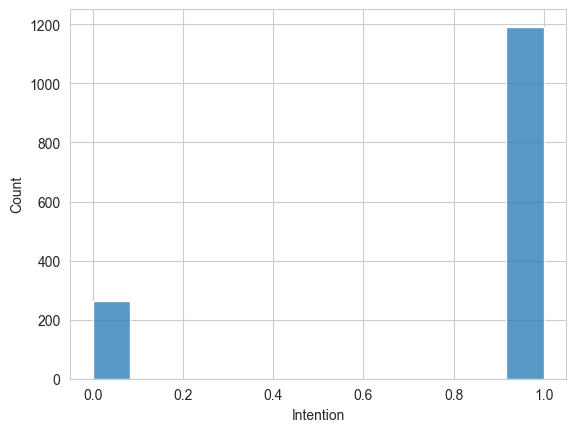

In [348]:
# exploration dataset

sns.histplot(df["Intention"])


https://chatgpt.com/c/4fc4b181-8d91-456f-a4d4-1cef2d01601a

### Split trainning-test set

In [359]:
## Train-Test

# X = df.iloc[:,:9].values
X = df.iloc[:,:5].values

# intention df.iloc[:,5]
# applied df.iloc[:,6]
# use/accepted df.iloc[:,7]

y = df.iloc[:,5].values

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.15, 
                                                    random_state=42)

# let's further split the training set into a training and a validation set (15%)
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train,
                                                  test_size=X_test.shape[0] / X_train.shape[0],  
                                                  random_state=42)

for x,y,name in zip([X_train, X_val, X_test],
                    [y_train, y_val, y_test],
                    ['train', 'val', 'test']):
    df = pd.DataFrame(np.hstack([x,y.reshape(-1,1)]))
    df.columns = df.columns
    df.to_csv(f'../data/{name}.csv')

### Models
- Model 0: Dummy model which predict alway the most frequent feature DONE
- Model 1: Predict/Classify the intention given demographical data DONE but get 0 prediction (maybe add more demographical data) and different models
- Model 2: Predict/Classify the intention given demographical data & Knowledge data (get prediction) add differents models
- Model 3: Predict/Classify the intention given demographical data & Knowledge data & which data include?
- Model 4: Interpretability

Describe the model use

In [373]:
# To track the performances of the models
performances = []


#### Model 0

In [374]:
model_name = 'dummy'

for x,y,nsplit in zip([X_train, X_val, X_test],
                    [y_train, y_val, y_test],
                    ['train', 'val', 'test']):

    dummy_clf = DummyClassifier(strategy="most_frequent")
    dummy_clf.fit(x, y)
    true_y = y
    predict_y = dummy_clf.predict(x)
    
    precision = precision_score(true_y, predict_y, average='binary')
    recall = recall_score(true_y, predict_y, average='binary')
    f1= f1_score(true_y, predict_y)

    performances.append({'model': model_name,
                         'split': nsplit,
                         'recall': recall,
                         'f1': f1,
                         'precision': precision})


#### Model 1

In [375]:
model_name = 'MLPClassifier demographic'
dem_cols = range(4)
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1,max_iter=1000)
scaler = StandardScaler()
scaler_x  = scaler.fit_transform(X_train[:,dem_cols])
reg = clf.fit((scaler_x), y_train)
pkl.dump(reg, file=open(f'/Users/sylvainestebe/Code/data_child/models/neural-dem.pkl', 'wb')) # save the model


In [376]:
for x,y,nsplit in zip([X_train, X_val, X_test],
                    [y_train, y_val, y_test],
                    ['train', 'val', 'test']):
    true_y = y
    scaler_x = scaler.fit_transform(x[:,dem_cols])
    predict_y = reg.predict(scaler_x)
    
    # evaluation
    precision = precision_score(true_y, predict_y, average='binary')
    recall = recall_score(true_y, predict_y, average='binary')
    f1= f1_score(true_y, predict_y)
    
    # append to dataframe performance
    performances.append({'model': model_name,
                         'split': nsplit,
                         'recall': recall,
                         'f1': f1,
                         'precision': precision})

In [377]:
performances

[{'model': 'dummy',
  'split': 'train',
  'recall': 1.0,
  'f1': 0.8992805755395683,
  'precision': 0.8169934640522876},
 {'model': 'dummy',
  'split': 'val',
  'recall': 1.0,
  'f1': 0.9354838709677419,
  'precision': 0.8787878787878788},
 {'model': 'dummy',
  'split': 'test',
  'recall': 1.0,
  'f1': 0.8620689655172413,
  'precision': 0.7575757575757576},
 {'model': 'MLPClassifier demographic',
  'split': 'train',
  'recall': 0.976,
  'f1': 0.9138576779026216,
  'precision': 0.8591549295774648},
 {'model': 'MLPClassifier demographic',
  'split': 'val',
  'recall': 0.9655172413793104,
  'f1': 0.9180327868852458,
  'precision': 0.875},
 {'model': 'MLPClassifier demographic',
  'split': 'test',
  'recall': 1.0,
  'f1': 0.8771929824561403,
  'precision': 0.78125}]

#### Model 2

In [378]:
model_name = 'MLPClassifier demographic + know'
dem_cols = range(5)
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1,max_iter=1000)
scaler = StandardScaler()
scaler_x  = scaler.fit_transform(X_train[:,dem_cols])
reg = clf.fit((scaler_x), y_train)
pkl.dump(reg, file=open(f'/Users/sylvainestebe/Code/data_child/models/neural-dem.pkl', 'wb')) # save the model


In [379]:
for x,y,nsplit in zip([X_train, X_val, X_test],
                    [y_train, y_val, y_test],
                    ['train', 'val', 'test']):
    true_y = y
    scaler_x = scaler.fit_transform(x[:,dem_cols])
    predict_y = reg.predict(scaler_x)
    
    # evaluation
    precision = precision_score(true_y, predict_y, average='binary')
    recall = recall_score(true_y, predict_y, average='binary')
    f1= f1_score(true_y, predict_y)
    
    # append to dataframe performance
    performances.append({'model': model_name,
                         'split': nsplit,
                         'recall': recall,
                         'f1': f1,
                         'precision': precision})

### Model comparison

#### Exemple for the evaluation

In [341]:
## Evaluation

# F1

# binary classification
y_true_empty = [1, 1, 1, 1, 1, 0]
y_pred_empty = [1, 1, 1, 1, 1, 0]
f1_score(y_true_empty, y_pred_empty)

# recall

y_true = [1, 1, 1, 1, 1, 0]
y_pred = [1, 1, 1, 1, 1, 0]
recall_score(y_true, y_pred, average='binary')

# precision (maybe more important because we want predict the type of person who do not applied)

y_true = [1, 1, 1, 1, 1, 0]
y_pred = [1, 1, 1, 1, 1, 0]
precision_score(y_true, y_pred, average='binary')


1.0

#### Model comparison

In [380]:
perf_df = pd.DataFrame(performances)

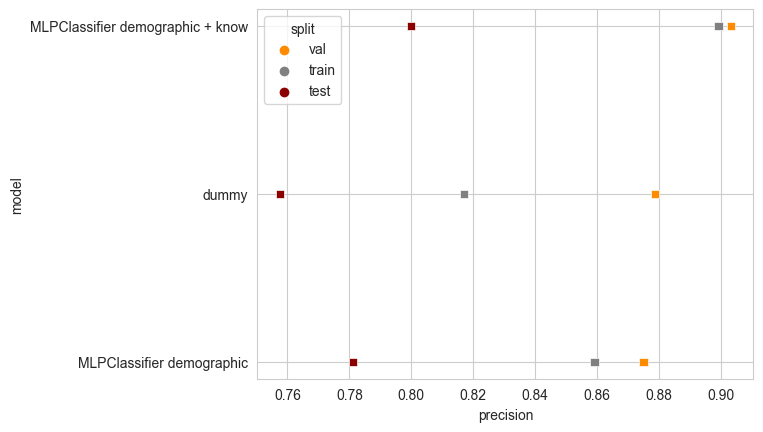

In [381]:
sns.set_style('whitegrid')
sns.scatterplot(data=perf_df.sort_values(by='precision', ascending=False), 
                y='model', 
                x='precision', 
                marker='s', 
                hue='split', palette=['darkorange', 'grey', 'darkred'])
plt.show()

### Matrix confusion

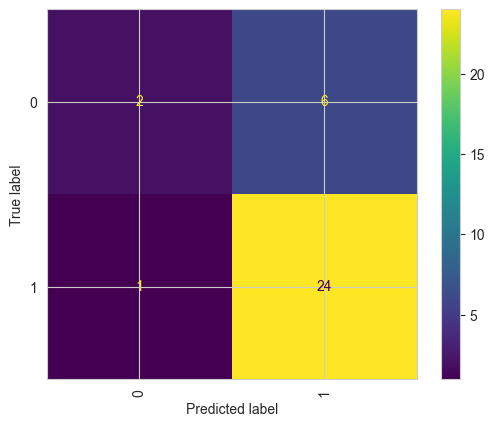

In [382]:
cm = confusion_matrix(true_y, predict_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.xticks(rotation=90)
plt.show()

### Select the best model

## Question 2 

https://johnfengphd.medium.com/multi-label-binary-classification-with-deep-learning-e59fcef20a5e
https://chatgpt.com/c/0667f7d8-b369-428a-8488-5f0654fe7452

In [ ]:
# split train-test

In [ ]:
# Model (multilabel)
# add neural network

In [171]:
# X = df.iloc[:,:9].values
X = df.iloc[:,:5].values

# intention df.iloc[:,5]
# applied df.iloc[:,6]
# use/accepted df.iloc[:,7]

y = df.iloc[:,5].values

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.15, 
                                                    random_state=42)

# let's further split the training set into a training and a validation set (15%)
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train,
                                                  test_size=X_test.shape[0] / X_train.shape[0],  
                                                  random_state=42)

In [173]:
for x,y,name in zip([X_train, X_val, X_test],
                    [y_train, y_val, y_test],
                    ['train', 'val', 'test']):
    df = pd.DataFrame(np.hstack([x,y.reshape(-1,1)]))
    df.columns = df.columns
    df.to_csv(f'../data/{name}.csv')

## Can we predict if a person have the intention if she will be accepted and applied?

# Structure 
Pipeline (Start simple):
- Datacuration
- Split (Train/Test/Validation)
- Question : Can we predict which category of people do not have the intention (one label) ? Can we predict a person which have the intention will applied? Will be accepted? (two label)
- Model (Dummy)
- Model (Neural Network)
- Model (Tree/Xboost)
- Model (??)
- Fit the model
- Evaluate the model (F1, Precision and Recall) 
- Optional : Can we find some cluster ? (exploratory)

Pipeline (Complexify):
- Use other data and try to find something consistent
- Add regularisation 


In [ ]:
# regularisation
# https://chatgpt.com/c/4fc4b181-8d91-456f-a4d4-1cef2d01601a

In [ ]:
# multilabel classification
y_true = [[0, 0, 0], [1, 1, 1], [0, 1, 1]]
y_pred = [[0, 0, 0], [1, 1, 1], [1, 1, 0]]
f1_score(y_true, y_pred, average=None)